<a href="https://colab.research.google.com/github/SeongcheolJeong/SeongcheolJeong.github.io/blob/main/dvs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# projection (unit 좌표에 projection)
# 그냥 projection 식은 프로젝션에 대한 정보가 없고, 이미 동차식이 완성되면 다 된 거임(X,Y,Z 가 나오면 다나온거)
# 원점은 주점
# 그러면 ojbect 의 회전과 병진에 대해서 먼저 식을 쓰면,
# 회전식 R = np.array([[r11,r12,r13],[r21,r22,r23],[r31,r32,r33]]), 병진 T = np.array([tx,ty,tz])
# init_object 좌표 InitObject = np.array([x,y,z])
# 회전 및 병진에 의해  RT = np.concatenate((R,T.T),axis=1))
# rotTransObject = RT.dot(InitObject.T)

# rotation 행렬은 orthornormal 함.
# 로드리게스 변환을 이용하면? (특정축을 기준으로 회전 변환, 축과 각도가 필요함)
# 암튼 orthonormal 한 벡터 3개면 회전변환임
# a = (ax,ay,az) 값으로 회전변환을 표시하자.
"""
 rodrigues
 a = np.array([ax,ay,az])
 c = np.cos(alpha)
 s = np.sin(alpha)
 rodrigues = np.array([(1-c)*ax^2+c, (1-c)*ax*ay-s*az, (1-c)*ax*az + s*ay],
                      [(1-c)*ax*ay+s*az, (1-c)*ay^2 + c, (1-c)*ay*az - s*ax],
                      [(1-c)*ax*az-s*ay, (1-c)*ay*az + s*ax, (1-c)*az^2 + c])
 """

# 3차원에서 rodrigues 변환해서 보자
# z 회전은 없는 걸로 합시다. (그냥하자)


ax = 1.;ay=2.;az=0.

a = np.sqrt(ax**2+ay**2+az**2)

ax=ax/a;ay=ay/a;az=az/a


import numpy as np
x = np.linspace(0,1000,1000,endpoint=False)
# 2hz 의 주파수 초당 두번 sin(2pift)
freq = 2
y = np.sin(2*np.pi*freq*x/1000)

# 각도 2도
_rad = np.deg2rad(2)
rad = _rad * np.sin(2*np.pi*freq*x/1000)

c = np.cos(rad)
s = np.sin(rad)

#rodrigues
R = np.array([[(1 - c) * ax ** 2 + c, (1 - c) * ax * ay - s * az, (1 - c) * ax * az + s * ay],
                     [(1 - c) * ax * ay + s * az, (1 - c) * ay ** 2 + c, (1 - c) * ay * az - s * ax],
                     [(1 - c) * ax * az - s * ay, (1 - c) * ay * az + s * ax, (1 - c) * az ** 2 + c]])

# R vector 완성
# K(X0) = x0 (R0)   K(R1(X0)) = x1  (R1)
# KR1-1K-1(x1) = x0
# x0 로부터 X0 를 만들자.
# X = K-1(x0)
# pixel unit 으로
f = 4000
cx = 240
cy = 320
K = np.array([[f,0,cx],[0,f,cy],[0,0,1]])
# 이미지라는 것 cx,cy 만큼 offset 이 되어 있다. 위아래는 그대로 보이고, 좌우는 반대로 보임.
Kinv = np.linalg.inv(K)

u = 10;v=10
x0 = np.array([u,v,1])
X0 = Kinv.dot(x0.T)



ax = 1.;ay=2.;az=0.

a = np.sqrt(ax**2+ay**2+az**2)

ax=ax/a;ay=ay/a;az=az/a

rad = 0.03

c = np.cos(rad)
s = np.sin(rad)

#rodrigues
R = np.array([[(1 - c) * ax ** 2 + c, (1 - c) * ax * ay - s * az, (1 - c) * ax * az + s * ay],
                     [(1 - c) * ax * ay + s * az, (1 - c) * ay ** 2 + c, (1 - c) * ay * az - s * ax],
                     [(1 - c) * ax * az - s * ay, (1 - c) * ay * az + s * ax, (1 - c) * az ** 2 + c]])

X1 = R.dot(X0)

x = 10;y=30;z=0

initObject = np.array([x,y,z])

rotObject = rodrigues.dot(initObject.T)
xx=np.float32(rotObject)
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

# original  x0=K0R0(X)
# step1 = x1=K1R1(X)
# step1 을 original view 로 이동시키려면, K1R1R0-1K0-1(x0)
# 우선 K를 고정, R0,R1 은 모르는 상태인데, R0=[[1,0,0],[0,1,0],[0,0,1]] 로 해보자
# gyro 신호로부터, R1 을 유추해보자.
# 시간당 x,y 각속도.. 일정시간후의 각도 및 R1?
# 매우 짧은시간이라면, 그냥 적용해도 되는데, 장시간이 되면, 다르게 생각해봐야 한다.
# R 을 계속해서 갱신해나간다면? 식은 어떻게?
# R0 + delta ->R1 + delta ->R2
# R0 -> R2 와는 다르다..
# R0 와 회전변환 delta   deltaR0
# X각속도,Y각속도로 부터 회전 변환, 예를 들면 5 ms ? 씩 끊는다. 하나의 프레임속도 감안하면 얼마나가 적당?
# 그냥 한프레임분이라고 생각하자. rolling shutter 는 나중에.
# 손떨림을 2 Hz 로 만들어보고, gyro 신호도 만들고, 대각선으로 Test
# 각 프레임당 Warping 된 이미지 생성                                                          
# warp 함수 opencv  output = warp(input)        warp를 따로 만들자.K1R1R0-1K0-1(x0)
# x각도,y각도 rotation matrix
"""
Rx(thetaX) = [[1,0,0],[0,cos(thetaX),-sin(thetaX)],[0,sin(thetaX),cos(thetaX)]]
Ry(thetaY) = [[cos(thetaY),0,sin(thetaY)],[0,1,0],[-sin(thetaY),0,cos(thetaY)]]
Rz(thetaZ) = [[cos(thetaZ),-sin(thetaZ),0],[sin(thetaZ),cos(thetaZ),0],[0,0,1]]

Rtheta = Rx.dot(Ry.dot(Rz))
"""
# K = [[f,0,0],[0,f,0],[0,0,1]]
# remap 

import cv2
img= cv2.imread('./sample_data/mandarin.jpg',cv2.IMREAD_COLOR)
import matplotlib.pyplot as plt

img.shape
h, w = img.shape[:2]
import numpy as np
map2, map1 = np.indices((h,w), dtype=np.float32)
map2 = map2 + 10*np.sin(map1/32)

dst = cv2.remap(img,map1,map2,cv2.INTER_CUBIC, borderMode=cv2.BORDER_DEFAULT)


# 각도가 Sine 파, sampling, 주기, 단위 ms
"""
ms 로

x = np.linspace(0,1000,1)
"""

import numpy as np
x = np.linspace(0,1000,1000,endpoint=False)
# 2hz 의 주파수 초당 두번 sin(2pift)
freq = 2
y = np.sin(2*np.pi*freq*x/1000)

# 각도 2도
_rad = np.deg2rad(2)
rad = _rad * np.sin(2*np.pi*freq*x/1000)

# rodrigues vector ()


# 실제로는 3D data  가 있고, 이것을 Viewing 하는 시뮬레이션이 적합하다.


In [ ]:
# input data 에 Noise 넣기
"""
노이즈 성분:
gyro: temporal noise, offset, phase delay, fail (), sampling
hall: hall offset, temporal noise

Input signal:peak 각속도, max 각도

# 일단 gyro offset 에 대해, 문제점 확인
# gyro 에 offset 이 있는 input data 를 만들자.
# gyro offset 은 각속도가 작을 때 큰 영향을 끼침

#z-rotation 의 측정이 없는 경우를 만들자. 이건 좀 의미가 없겠음.
# gyro offset 의 경우 key frame 에 멀어질 수록 어마어마한 차이를 발생(critical)
# gyro 는 각도가 filter 로 나오니까.. 좀
# gyro simulator 가 있는가?
# 구글꺼 예제로 Test 해보자.
# video 에서 



In [ ]:
# gyro offset 이 있을 떄 comp

import numpy as np
import cv2

img= cv2.imread('Chessboard.jpg',cv2.IMREAD_COLOR)
h, w = img.shape[:2]

f = h/2
cx0 = w/2
cy0 = h/2

# cx,cy list
centerXs = []
centerYs = []

centerDiff = 0.003 /h

for i in range(h*1000):
  centerXs.append(cx0+centerDiff*i)
  centerYs.append(cy0+centerDiff*i)

K = []
for i in range(h*1000):
  K.append(np.array([[f,0,centerXs[i]],[0,f,centerYs[i]],[0,0,1]]))

Kinv = []
for i in range(h*1000):
  Kinv.append(np.linalg.inv(K[i]))

# x1 = K1R1(X0), x0 = K0R0(X0), x1 = K1R1R0-1K0-1(x0), R0=np.array([[1,0,0,],[0,1,0],[0,0,1]])
# x0 에 x1 이 어떻게 맵핑되는지.. x1 이 x0 에 의해 표시되어야 함.
# 
radDiff = np.deg2rad(0.002) / h
radDiffs = []
gyroOffset = 0.002/h/10
for i in range(h*1000-1):
  radDiffs.append([gyroOffset+radDiff,gyroOffset+radDiff,gyroOffset+radDiff])

Rs = []
R0 = np.array([[1,0,0],[0,1,0],[0,0,1]])
Rs.append(R0)
for i, radDiff_ in enumerate(radDiffs):
  Rx = np.array([[1,0,0],[0,np.cos(radDiff_[0]),-np.sin(radDiff_[0])],[0,np.sin(radDiff_[0]),np.cos(radDiff_[0])]])
  Ry = np.array([[np.cos(radDiff_[1]),0,np.sin(radDiff_[1])],[0,1,0],[-np.sin(radDiff_[1]),0,np.cos(radDiff_[1])]])
  Rz = np.array([[np.cos(radDiff_[2]),-np.sin(radDiff_[2]),0],[np.sin(radDiff_[2]),np.cos(radDiff_[2]),0],[0,0,1]])
  Rdiff = Rz.dot(Ry.dot(Rx))
  R = Rdiff.dot(Rs[i])
  Rs.append(R)

Rinvs = []
for _R in Rs:
  Rinvs.append(np.linalg.inv(_R))

import os

flist = os.listdir('./test')

for f in flist:
  if(f.split('.')[1]!='jpg'): continue
  index = int(f.split('.')[0])
  img= cv2.imread('./test/'+ f,cv2.IMREAD_COLOR)

  map2, map1 = np.indices((h,w), dtype=np.float32)

  dstMaps1 = np.zeros((h,w), np.float32)
  dstMaps2 = np.zeros((h,w), np.float32)
  for j in range(h):
    _map = np.vstack((map1[j],map2[j],np.ones_like(map1[j])))

    x1=K[index + j].dot(Rs[index + j].dot((Kinv[0].dot(_map))))

    dstMap1 = x1[0]/x1[2]
    dstMap1 = dstMap1.astype(np.float32)
    dstMap2 = x1[1]/x1[2]
    dstMap2 = dstMap2.astype(np.float32)

    dstMaps1[j] = dstMap1
    dstMaps2[j] = dstMap2

  dst = cv2.remap(img,dstMaps1,dstMaps2,cv2.INTER_CUBIC)

  cv2.imwrite('./comp(wGyroOffset)/{0}.jpg'.format(index),dst)

In [ ]:
# comensation z-rotation 의 측정이 없는경우

import numpy as np
import cv2

img= cv2.imread('Chessboard.jpg',cv2.IMREAD_COLOR)
h, w = img.shape[:2]

f = h/2
cx0 = w/2
cy0 = h/2

# cx,cy list
centerXs = []
centerYs = []

centerDiff = 0.003 /h

for i in range(h*1000):
  centerXs.append(cx0+centerDiff*i)
  centerYs.append(cy0+centerDiff*i)

K = []
for i in range(h*1000):
  K.append(np.array([[f,0,centerXs[i]],[0,f,centerYs[i]],[0,0,1]]))

Kinv = []
for i in range(h*1000):
  Kinv.append(np.linalg.inv(K[i]))

# x1 = K1R1(X0), x0 = K0R0(X0), x1 = K1R1R0-1K0-1(x0), R0=np.array([[1,0,0,],[0,1,0],[0,0,1]])
# x0 에 x1 이 어떻게 맵핑되는지.. x1 이 x0 에 의해 표시되어야 함.
# 
radDiff = np.deg2rad(0.002) / h
radDiffs = []
for i in range(h*1000-1):
  radDiffs.append([radDiff,radDiff,0])

Rs = []
R0 = np.array([[1,0,0],[0,1,0],[0,0,1]])
Rs.append(R0)
for i, radDiff_ in enumerate(radDiffs):
  Rx = np.array([[1,0,0],[0,np.cos(radDiff_[0]),-np.sin(radDiff_[0])],[0,np.sin(radDiff_[0]),np.cos(radDiff_[0])]])
  Ry = np.array([[np.cos(radDiff_[1]),0,np.sin(radDiff_[1])],[0,1,0],[-np.sin(radDiff_[1]),0,np.cos(radDiff_[1])]])
  Rz = np.array([[np.cos(radDiff_[2]),-np.sin(radDiff_[2]),0],[np.sin(radDiff_[2]),np.cos(radDiff_[2]),0],[0,0,1]])
  Rdiff = Rz.dot(Ry.dot(Rx))
  R = Rdiff.dot(Rs[i])
  Rs.append(R)

Rinvs = []
for _R in Rs:
  Rinvs.append(np.linalg.inv(_R))

import os

flist = os.listdir('./test')

for f in flist:
  if(f.split('.')[1]!='jpg'): continue
  index = int(f.split('.')[0])
  img= cv2.imread('./test/'+ f,cv2.IMREAD_COLOR)

  map2, map1 = np.indices((h,w), dtype=np.float32)

  dstMaps1 = np.zeros((h,w), np.float32)
  dstMaps2 = np.zeros((h,w), np.float32)
  for j in range(h):
    _map = np.vstack((map1[j],map2[j],np.ones_like(map1[j])))

    x1=K[index + j].dot(Rs[index + j].dot((Kinv[0].dot(_map))))

    dstMap1 = x1[0]/x1[2]
    dstMap1 = dstMap1.astype(np.float32)
    dstMap2 = x1[1]/x1[2]
    dstMap2 = dstMap2.astype(np.float32)

    dstMaps1[j] = dstMap1
    dstMaps2[j] = dstMap2

  dst = cv2.remap(img,dstMaps1,dstMaps2,cv2.INTER_CUBIC)

  cv2.imwrite('./comp(woZrot)/{0}.jpg'.format(index),dst)

In [ ]:
# simulation
""" 
Rolling shutter: 각 행은 같은 타이밍이라고 보는게 맞다.
Frame rate 가 결정되면, 각행의 시간은 1/frame rate / virtical line
각시간에 따라 프로젝션된 이미지에서 해당 라인을 가져오게된다. (n frame image)

# x1 = K1R1(X0), x0 = K0R0(X0), x1 = K1R1R0-1K0-1(x0), R0=np.array([[1,0,0,],[0,1,0],[0,0,1]])
# x1 에 x0 가 어떻게 맵핑되는지.. x0 가 x1 에 의해 표시되어야 함. x0 = K0R0R1-1K1-1(x1)
# 각 행마다 Rotation matrix 가 다름. 행마다 만들고, 행마다 복원하고 해야..
# line 당 map 을 만들어서 remap 쓰면 된다.
# generation 할 떄, rolling shutter 된 이미지에 대해서 원래 이미지로 변환하는 식을 사용해야함.
# rolling shutter 된 이미지?
# 똑같이 만들되 행별로 처리하자
"""


import numpy as np
import matplotlib.pyplot as plt
import cv2
img= cv2.imread('Chessboard.jpg',cv2.IMREAD_COLOR)

h, w = img.shape[:2]

f = h/2
cx0 = w/2
cy0 = h/2
# cx,cy list
centerXs = []
centerYs = []

centerDiff = 0.003 / h


for i in range(h*1000):
  centerXs.append(cx0+centerDiff*i)
  centerYs.append(cy0+centerDiff*i)

K = []
for i in range(h*1000):
  K.append(np.array([[f,0,centerXs[i]],[0,f,centerYs[i]],[0,0,1]]))

Kinv = []
for i in range(h*1000):
  Kinv.append(np.linalg.inv(K[i]))

# x1 = K1R1(X0), x0 = K0R0(X0), x1 = K1R1R0-1K0-1(x0), R0=np.array([[1,0,0,],[0,1,0],[0,0,1]])
# x1 에 x0 가 어떻게 맵핑되는지.. x0 가 x1 에 의해 표시되어야 함. x0 = K0R0R1-1K1-1(x1)

#radDiff = np.deg2rad(0.002) / h
radDiff = np.deg2rad(0.002) / h



radDiffs = []
for i in range(h*1000-1):
  radDiffs.append([radDiff,radDiff,radDiff])



Rs = []
R0 = np.array([[1,0,0],[0,1,0],[0,0,1]])
Rs.append(R0)
for i, radDiff_ in enumerate(radDiffs):
  Rx = np.array([[1,0,0],[0,np.cos(radDiff_[0]),-np.sin(radDiff_[0])],[0,np.sin(radDiff_[0]),np.cos(radDiff_[0])]])
  Ry = np.array([[np.cos(radDiff_[1]),0,np.sin(radDiff_[1])],[0,1,0],[-np.sin(radDiff_[1]),0,np.cos(radDiff_[1])]])
  Rz = np.array([[np.cos(radDiff_[2]),-np.sin(radDiff_[2]),0],[np.sin(radDiff_[2]),np.cos(radDiff_[2]),0],[0,0,1]])
  Rdiff = Rz.dot(Ry.dot(Rx))
  R = Rdiff.dot(Rs[i])
  Rs.append(R)

# i 기준으로 (시간 기준으로 돌려야겠다.)
for i in range(h*800):
  
  # 10번째 Frame 마다
  if(i% (h*10) ==0):

    map2, map1 = np.indices((h,w), dtype=np.float32)
    # map 을 512 개로 쪼개서 계산한다음에 다시 concat

    orgMaps1 = np.zeros((h,w), np.float32)
    orgMaps2 = np.zeros((h,w), np.float32)
    for j in range(h):
      Rinv = np.linalg.inv(Rs[i+j])
      _map = np.vstack((map1[j],map2[j],np.ones_like(map1[j])))

      x0=K[0].dot(Rinv.dot((Kinv[i+j].dot(_map))))

      orgMap1 = x0[0]/x0[2]
      orgMap1 = orgMap1.astype(np.float32)
      orgMap2 = x0[1]/x0[2]
      orgMap2 = orgMap2.astype(np.float32)

      orgMaps1[j] = orgMap1
      orgMaps2[j] = orgMap2


    dst = cv2.remap(img,orgMaps1,orgMaps2,cv2.INTER_CUBIC)
    cv2.imwrite('./test/{0}.jpg'.format(i),dst)

In [ ]:
# comensation

import numpy as np
import cv2

img= cv2.imread('Chessboard.jpg',cv2.IMREAD_COLOR)
h, w = img.shape[:2]

f = h/2
cx0 = w/2
cy0 = h/2

# cx,cy list
centerXs = []
centerYs = []

centerDiff = 0.003 /h

for i in range(h*1000):
  centerXs.append(cx0+centerDiff*i)
  centerYs.append(cy0+centerDiff*i)

K = []
for i in range(h*1000):
  K.append(np.array([[f,0,centerXs[i]],[0,f,centerYs[i]],[0,0,1]]))

Kinv = []
for i in range(h*1000):
  Kinv.append(np.linalg.inv(K[i]))

# x1 = K1R1(X0), x0 = K0R0(X0), x1 = K1R1R0-1K0-1(x0), R0=np.array([[1,0,0,],[0,1,0],[0,0,1]])
# x0 에 x1 이 어떻게 맵핑되는지.. x1 이 x0 에 의해 표시되어야 함.
# 
radDiff = np.deg2rad(0.002) / h
radDiffs = []
for i in range(h*1000-1):
  radDiffs.append([radDiff,radDiff,radDiff])

Rs = []
R0 = np.array([[1,0,0],[0,1,0],[0,0,1]])
Rs.append(R0)
for i, radDiff_ in enumerate(radDiffs):
  Rx = np.array([[1,0,0],[0,np.cos(radDiff_[0]),-np.sin(radDiff_[0])],[0,np.sin(radDiff_[0]),np.cos(radDiff_[0])]])
  Ry = np.array([[np.cos(radDiff_[1]),0,np.sin(radDiff_[1])],[0,1,0],[-np.sin(radDiff_[1]),0,np.cos(radDiff_[1])]])
  Rz = np.array([[np.cos(radDiff_[2]),-np.sin(radDiff_[2]),0],[np.sin(radDiff_[2]),np.cos(radDiff_[2]),0],[0,0,1]])
  Rdiff = Rz.dot(Ry.dot(Rx))
  R = Rdiff.dot(Rs[i])
  Rs.append(R)

Rinvs = []
for _R in Rs:
  Rinvs.append(np.linalg.inv(_R))

import os

flist = os.listdir('./test')

for f in flist:
  if(f.split('.')[1]!='jpg'): continue
  index = int(f.split('.')[0])
  img= cv2.imread('./test/'+ f,cv2.IMREAD_COLOR)

  map2, map1 = np.indices((h,w), dtype=np.float32)

  dstMaps1 = np.zeros((h,w), np.float32)
  dstMaps2 = np.zeros((h,w), np.float32)
  for j in range(h):
    _map = np.vstack((map1[j],map2[j],np.ones_like(map1[j])))

    x1=K[index + j].dot(Rs[index + j].dot((Kinv[0].dot(_map))))

    dstMap1 = x1[0]/x1[2]
    dstMap1 = dstMap1.astype(np.float32)
    dstMap2 = x1[1]/x1[2]
    dstMap2 = dstMap2.astype(np.float32)

    dstMaps1[j] = dstMap1
    dstMaps2[j] = dstMap2

  dst = cv2.remap(img,dstMaps1,dstMaps2,cv2.INTER_CUBIC)

  cv2.imwrite('./comp/{0}.jpg'.format(index),dst)

In [ ]:
# input signal 에 Noise 를 섞어서.. 만들기
# gyro sampling rate

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
img= cv2.imread('Chessboard.jpg',cv2.IMREAD_COLOR)

h, w = img.shape[:2]

f = 150
cx = w/2
cy = h/2
K = np.array([[f,0,cx],[0,f,cy],[0,0,1]])
# 이미지라는 것 cx,cy 만큼 offset 이 되어 있다. 위아래는 그대로 보이고, 좌우는 반대로 보임.
Kinv = np.linalg.inv(K)

radDiff = np.deg2rad(0.002)
radDiffs = []
for i in range(8000):
  radDiffs.append([radDiff,radDiff,radDiff])

Rs = []
R0 = np.array([[1,0,0],[0,1,0],[0,0,1]])
Rs.append(R0)
for i, radDiff_ in enumerate(radDiffs):
  Rx = np.array([[1,0,0],[0,np.cos(radDiff_[0]),-np.sin(radDiff_[0])],[0,np.sin(radDiff_[0]),np.cos(radDiff_[0])]])
  Ry = np.array([[np.cos(radDiff_[1]),0,np.sin(radDiff_[1])],[0,1,0],[-np.sin(radDiff_[1]),0,np.cos(radDiff_[1])]])
  Rz = np.array([[np.cos(radDiff_[2]),-np.sin(radDiff_[2]),0],[np.sin(radDiff_[2]),np.cos(radDiff_[2]),0],[0,0,1]])
  Rdiff = Rz.dot(Ry.dot(Rx))
  R = Rdiff.dot(Rs[i])
  Rs.append(R)

print(cx,cy)
for i,R_ in enumerate(Rs):

  if(i%100 ==0):
    Rinv = np.linalg.inv(R_)

    map2, map1 = np.indices((h,w), dtype=np.float32)

    map1 = map1.reshape(-1,1)
    map2 = map2.reshape(-1,1)
    m = np.ones_like(map1)
    _map = np.concatenate((map1,map2,np.ones_like(map1)), axis=1)
    print(_map)
    break
    x0=K.dot(Rinv.dot((Kinv.dot(_map.T))))

    map11 = x0[0]/x0[2]
    map11 = map11.reshape(h,w)
    map11 = map11.astype(np.float32)
    map22 = x0[1]/x0[2]
    map22 = map22.reshape(h,w)
    map22 = map22.astype(np.float32)

    dst = cv2.remap(img,map11,map22,cv2.INTER_CUBIC)

    cv2.imwrite('./test/{0}.jpg'.format(i),dst)


# Rotation matrix 를 안다고 하고, 원복해보자.

# gyro 신호로부터 Rotation matrix 구하기.
# unit 1ms 당 각도변화 radDiff
# KR(X0) = x0, X0 = R-1K-1(x0), K1R1(X0) = x1,  x1 = K1R1R-1K-1(x0), x1=KR1K-1(x0)







160.0 160.0
[[  0.   0.   1.]
 [  1.   0.   1.]
 [  2.   0.   1.]
 ...
 [317. 319.   1.]
 [318. 319.   1.]
 [319. 319.   1.]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
img= cv2.imread('Chessboard.png',cv2.IMREAD_COLOR)

h, w = img.shape[:2]

f = 150
cx0 = w/2
cy0 = h/2
# cx,cy list
centerXs = []
centerYs = []

centerDiff = 0.003

for i in range(8000):
  centerXs.append(cx0+centerDiff*i)
  centerYs.append(cy0+centerDiff*i)

K = []
for i in range(8000):
  K.append(np.array([[f,0,centerXs[i]],[0,f,centerYs[i]],[0,0,1]]))

Kinv = []
for i in range(8000):
  Kinv.append(np.linalg.inv(K[i]))

# x1 = K1R1(X0), x0 = K0R0(X0), x1 = K1R1R0-1K0-1(x0), R0=np.array([[1,0,0,],[0,1,0],[0,0,1]])
# x1 에 x0 가 어떻게 맵핑되는지.. x0 가 x1 에 의해 표시되어야 함. x0 = K0R0R1-1K1-1(x1)

radDiff = np.deg2rad(0.002)
radDiffs = []
for i in range(8000-1):
  radDiffs.append([radDiff,radDiff,radDiff])

Rs = []
R0 = np.array([[1,0,0],[0,1,0],[0,0,1]])
Rs.append(R0)
for i, radDiff_ in enumerate(radDiffs):
  Rx = np.array([[1,0,0],[0,np.cos(radDiff_[0]),-np.sin(radDiff_[0])],[0,np.sin(radDiff_[0]),np.cos(radDiff_[0])]])
  Ry = np.array([[np.cos(radDiff_[1]),0,np.sin(radDiff_[1])],[0,1,0],[-np.sin(radDiff_[1]),0,np.cos(radDiff_[1])]])
  Rz = np.array([[np.cos(radDiff_[2]),-np.sin(radDiff_[2]),0],[np.sin(radDiff_[2]),np.cos(radDiff_[2]),0],[0,0,1]])
  Rdiff = Rz.dot(Ry.dot(Rx))
  R = Rdiff.dot(Rs[i])
  Rs.append(R)

for i,R_ in enumerate(Rs):
  
  if(i%100 ==0):
    Rinv = np.linalg.inv(R_)

    map2, map1 = np.indices((h,w), dtype=np.float32)

    map1 = map1.reshape(-1,1)
    map2 = map2.reshape(-1,1)
    m = np.ones_like(map1)
    _map = np.concatenate((map1,map2,np.ones_like(map1)), axis=1)
    x0=K[0].dot(Rinv.dot((Kinv[i].dot(_map.T))))

    map11 = x0[0]/x0[2]
    map11 = map11.reshape(h,w)
    map11 = map11.astype(np.float32)
    map22 = x0[1]/x0[2]
    map22 = map22.reshape(h,w)
    map22 = map22.astype(np.float32)


    dst = cv2.remap(img,map11,map22,cv2.INTER_CUBIC)

    cv2.imwrite('./test/{0}.jpg'.format(i),dst)

In [ ]:
import numpy as np
import cv2

h, w = img.shape[:2]

f = 150
cx = w/2
cy = h/2
K = np.array([[f,0,cx],[0,f,cy],[0,0,1]])

Kinv = np.linalg.inv(K)

import os

flist = os.listdir('./test')

for f in flist:
  if (f.split('.')[1]!='jpg'): continue
  index = int(f.split('.')[0])
  img= cv2.imread('./test/' + f,cv2.IMREAD_COLOR)

  map2, map1 = np.indices((h,w), dtype=np.float32)

  map1 = map1.reshape(-1,1)
  map2 = map2.reshape(-1,1)
  _map = np.concatenate((map1,map2,np.ones_like(map1)), axis=1)
  x0=K.dot(Rs[index].dot((Kinv.dot(_map.T))))

  map11 = x0[0]/x0[2]
  map11 = map11.reshape(h,w)
  map11 = map11.astype(np.float32)
  map22 = x0[1]/x0[2]
  map22 = map22.reshape(h,w)
  map22 = map22.astype(np.float32)


  dst = cv2.remap(img,map11,map22,cv2.INTER_CUBIC)

  cv2.imwrite('./comp/{0}.jpg'.format(index),dst)




In [ ]:
#cx,cy 반영할 경우

import numpy as np
import cv2

img= cv2.imread('Chessboard.png',cv2.IMREAD_COLOR)
h, w = img.shape[:2]

f = 150
cx0 = w/2
cy0 = h/2

# cx,cy list
centerXs = []
centerYs = []

centerDiff = 0.003

for i in range(8000):
  centerXs.append(cx0+centerDiff*i)
  centerYs.append(cy0+centerDiff*i)

K = []
for i in range(8000):
  K.append(np.array([[f,0,centerXs[i]],[0,f,centerYs[i]],[0,0,1]]))

Kinv = []
for i in range(8000):
  Kinv.append(np.linalg.inv(K[i]))

# x1 = K1R1(X0), x0 = K0R0(X0), x1 = K1R1R0-1K0-1(x0), R0=np.array([[1,0,0,],[0,1,0],[0,0,1]])
# x0 에 x1 이 어떻게 맵핑되는지.. x1 이 x0 에 의해 표시되어야 함.
# 
radDiff = np.deg2rad(0.002)
radDiffs = []
for i in range(8000-1):
  radDiffs.append([radDiff,radDiff,radDiff])

Rs = []
R0 = np.array([[1,0,0],[0,1,0],[0,0,1]])
Rs.append(R0)
for i, radDiff_ in enumerate(radDiffs):
  Rx = np.array([[1,0,0],[0,np.cos(radDiff_[0]),-np.sin(radDiff_[0])],[0,np.sin(radDiff_[0]),np.cos(radDiff_[0])]])
  Ry = np.array([[np.cos(radDiff_[1]),0,np.sin(radDiff_[1])],[0,1,0],[-np.sin(radDiff_[1]),0,np.cos(radDiff_[1])]])
  Rz = np.array([[np.cos(radDiff_[2]),-np.sin(radDiff_[2]),0],[np.sin(radDiff_[2]),np.cos(radDiff_[2]),0],[0,0,1]])
  Rdiff = Rz.dot(Ry.dot(Rx))
  R = Rdiff.dot(Rs[i])
  Rs.append(R)


import os

flist = os.listdir('./test')

for f in flist:
  if(f.split('.')[1]!='jpg'): continue
  index = int(f.split('.')[0])
  img= cv2.imread('./test/'+ f,cv2.IMREAD_COLOR)

  map2, map1 = np.indices((h,w), dtype=np.float32)

  map1 = map1.reshape(-1,1)
  map2 = map2.reshape(-1,1)
  _map = np.concatenate((map1,map2,np.ones_like(map1)), axis=1)

  x1=K[index].dot(Rs[index].dot((Kinv[0].dot(_map.T))))

  map11 = x1[0]/x1[2]
  map11 = map11.reshape(h,w)
  map11 = map11.astype(np.float32)
  map22 = x1[1]/x1[2]
  map22 = map22.reshape(h,w)
  map22 = map22.astype(np.float32)


  dst = cv2.remap(img,map11,map22,cv2.INTER_CUBIC)

  cv2.imwrite('./compcxcy/{0}.jpg'.format(index),dst)

In [ ]:
import os
filelist = os.listdir('./')

for file_ in filelist:
  if (file_[-3:]=='jpg'):
    if(file_.split('.')[0]!='bike'):
      if(int(file_.split('.')[0])%100==0):
        print(file_)


1600.jpg
5400.jpg
5700.jpg
5500.jpg
1000.jpg
7700.jpg
3000.jpg
4000.jpg
6700.jpg
1800.jpg
1300.jpg
7600.jpg
2100.jpg
6300.jpg
5000.jpg
3600.jpg
2600.jpg
8000.jpg
4700.jpg
800.jpg
2800.jpg
0.jpg
2700.jpg
7200.jpg
3400.jpg
4600.jpg
5300.jpg
400.jpg
6900.jpg
2000.jpg
7500.jpg
7800.jpg
6600.jpg
4100.jpg
6100.jpg
4400.jpg
7100.jpg
1700.jpg
5200.jpg
4200.jpg
3700.jpg
6000.jpg
2200.jpg
2500.jpg
200.jpg
7900.jpg
900.jpg
2400.jpg
7000.jpg
4500.jpg
3200.jpg
5800.jpg
100.jpg
500.jpg
5100.jpg
2300.jpg
6400.jpg
5900.jpg
600.jpg
7300.jpg
1200.jpg
6500.jpg
1400.jpg
7400.jpg
700.jpg
3100.jpg
3900.jpg
4300.jpg
4800.jpg
5600.jpg
3500.jpg
2900.jpg
300.jpg
4900.jpg
1500.jpg
1900.jpg
3300.jpg
1100.jpg
6800.jpg
3800.jpg
6200.jpg


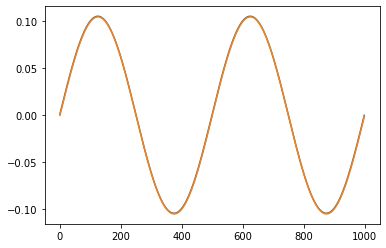

In [ ]:
# gyro signal
# ms 단위로 표시하자
import numpy as np
x = np.linspace(0,1000,1000,endpoint=False)
# 2hz 의 주파수 ms 당0.002번 sin(2pift)
freq = 0.002
y = np.sin(2*np.pi*freq*x)

_rad = np.deg2rad(6)
rads = _rad * np.sin(2*np.pi*freq*x)

# 각속도는 각도의 미분 (함수의 파형이 결정되어 있다면.)
# 결정되어 있지 않다면 적분해야지..
# radsPs = d rads/ dx
# rads = integral (radsPs)
# 이거 샘플링 고려해서 어떻게 해야 하나?
# 단위 unit = k s, k 배 곱하면 됨.
# 덧셈한 후에 0.001 곱함.
radsPs = _rad * np.cos(2*np.pi*freq*x) * 2*np.pi*freq

# 30 ms 까지 보면,
rads_ = []
__rad = 0
for i,radPs in enumerate(radsPs):
  __rad = __rad + radPs
  rads_.append(__rad)
import matplotlib.pyplot as plt
plt.plot(rads_)
plt.plot(rads)


# gyro signal 을 이용한 Rotation matrix 의 갱신
# gyro signal 을 단위시간 적분하여(delta R 을 곱한다.)
# rads = radsPs / (2*np.pi*freq)
# 각 축각도의 시간별 이력 --> Rotation matrix
# Rotation matrix --> 각 축각도의 시간별 이력 (Ill pose problem)
# Rotation matrix 가 출발점이 아니라, 각 축별 각도 변화의 history 가 출발점임.
# 각도 변동 history 를 만들자. 1 ms 단위 [[x변동1,y변동1,z변동1],[x변동2,y변동2,z변동2],[x변동3,y변동3,z변동3]]
# rotation matrix
"""
1 초에 2도 0.002 deg/s, deg2rad(0.002)

radDiff = deg2rad(0.002)
radDiffs = []
for i in range(2000):
  radDiffs.append([radDiffs*i,radDiffs*i,radDiffs*i])

각도 변동량의 rotation matrix list

Rs = []

for radDiff_ in radDiffs:
  Rx = np.array([[1,0,0],[0,np.cos(radDiff_[0]),-np.sin(radDiff_[0])],[0,np.sin(radDiff_[0]),np.cos(radDiff_[0])]])
  Ry = np.array([[np.cos(radDiff_[1]),0,np.sin(radDiff_[1])],[0,1,0],[-np.sin(radDiff_[1]),0,np.cos(radDiff_[1])]])
  Rz = np.array([[np.cos(radDiff_[2]),-np.sin(radDiff_[2]),0],[np.sin(radDiff_[2]),np.cos(radDiff_[2]),0],[0,0,1]])
  R = Rz.dot(Ry.dot(Rx))
  Rs.append(R)


# 각도의 이력에서 gyro 신호를 구하면, 수치적으로, unit 당 각도 변화량.
# Rs 를 가지고, Image 를 만들고, Rs 를 가지고 Image 를 복원시킴.



In [ ]:
import cv2
img= cv2.imread('bike.jpg',cv2.IMREAD_COLOR)
import matplotlib.pyplot as plt

img.shape
h, w = img.shape[:2]


import numpy as np
f = 600
cx = w/2
cy = h/2
K = np.array([[f,0,cx],[0,f,cy],[0,0,1]])
# 이미지라는 것 cx,cy 만큼 offset 이 되어 있다. 위아래는 그대로 보이고, 좌우는 반대로 보임.
Kinv = np.linalg.inv(K)

u = 10;v=10
x0 = np.array([u,v,1])
X0 = Kinv.dot(x0.T)

# z 은 1인 unit 좌표 값이 나온다.
ax = 1.;ay=1.;az=0.

a = np.sqrt(ax**2+ay**2+az**2)

ax=ax/a;ay=ay/a;az=az/a

import numpy as np
x = np.linspace(0,1000,1000,endpoint=False)
# 2hz 의 주파수 초당 두번 sin(2pift)
freq = 2
y = np.sin(2*np.pi*freq*x/1000)

# 각도 2도
_rad = np.deg2rad(6)
rads = _rad * np.sin(2*np.pi*freq*x/1000)

# 1 frame 30 ms

frame = 0
for i,rad in enumerate(rads):
  if(i%30==0):
    print(i)
    frame = frame + 1
    c = np.cos(rad)
    s = np.sin(rad)

    #rodrigues
    R = np.array([[(1 - c) * ax ** 2 + c, (1 - c) * ax * ay - s * az, (1 - c) * ax * az + s * ay],
                        [(1 - c) * ax * ay + s * az, (1 - c) * ay ** 2 + c, (1 - c) * ay * az - s * ax],
                        [(1 - c) * ax * az - s * ay, (1 - c) * ay * az + s * ax, (1 - c) * az ** 2 + c]])

    Rinv = np.linalg.inv(R)

    map2, map1 = np.indices((h,w), dtype=np.float32)

    # map2,map1 concat 해서 계산한 후에 map 을 다시 나눠야하는데, map 은 2차원 배열이여서, 1차원으로 바꾼뒤에, 2차원으로 바꾸자.
    # 더 간단한 방법없냐?
    # x1=KRK-1(x0)
    # x0 = KR-1K-1(x1)) 근데 먼가 이상한데?

    map1 = map1.reshape(-1,1)
    map2 = map2.reshape(-1,1)
    m = np.ones_like(map1)
    _map = np.concatenate((map1,map2,np.ones_like(map1)), axis=1)


    x0=K.dot(Rinv.dot((Kinv.dot(_map.T))))

    map11 = x0[0]/x0[2]
    map11 = map11.reshape(h,w)
    map11 = map11.astype(np.float32)
    map22 = x0[1]/x0[2]
    map22 = map22.reshape(h,w)
    map22 = map22.astype(np.float32)


    dst = cv2.remap(img,map11,map22,cv2.INTER_CUBIC)

    cv2.imwrite('{0}.jpg'.format(frame),dst)

#remap 의 map, 각 위치의 pixel 값을 어디서 뽑아오는지에 대해 표현되어 있음.
# 원본데이터가 변화된 녀석으로부터 어떻게 표시되는지를
# 

0
30
60
90
120
150
180
210
240
270
300
330
360
390
420
450
480
510
540
570
600
630
660
690
720
750
780
810
840
870
900
930
960
990


In [ ]:
# gyro 신호가지고, 역산해서 복원
# 1 ms 단위로 계산+해
# 로드리게스 말고 그냥 하는게 심플하네. 이러면 안됨. 두번 계산된다. 로드리게스로 만들자.
# 
# 로드리게스에서 오일러 각도로 변환.하고 다시 gyro 신호로 만들어보자.
# 미분은 어떻게 하지. 그냥 미분.. 자 이걸 x,y 로 변형하려면.. 생각해보자.cos(), sin() 곱해주면 된다.
# 오일러를 로드리게스로..
# ax,ay,az  각도 값으로?
# 축 벡터, 각의 회전 벡터..  euler vector 애초에 변환이 안되네.. x,y,z angle 이라는 개념으로(회전순서에 따라 달라지므로)
# Xtanx = Ytany ; X:Y = tany:tanx  이거 아닌데..
# z 가 있는 경우는?
# 축이 기울어진것을 투영해서 각도 환산해도 각도는 동일..
# 작은 각도 3도 기준으로 XYZ 의 회전순서를 바꿔보자
import numpy as np
rad = np.deg2rad(3)

Rx = np.array([[1,0,0],[0,np.cos(rad),-np.sin(rad)],[0,np.sin(rad),np.cos(rad)]])
Ry = np.array([[np.cos(rad),0,np.sin(rad)],[0,1,0],[-np.sin(rad),0,np.cos(rad)]])
Rz = np.array([[np.cos(rad),-np.sin(rad),0],[np.sin(rad),np.cos(rad),0],[0,0,1]])

R1 = Rz.dot(Ry.dot(Rx))
R2 = Rx.dot(Ry.dot(Rz))
R3 = Ry.dot(Rz.dot(Rx))

x = np.array([1,1,1])

print(R1.dot(x))
print(R2.dot(x))+print(R3.dot(x))



++++++

[1.00266367 1.0001396  0.99718922]
[0.99733267 0.9998529  1.00280692]
[1.00280692 0.99733267 0.9998529 ]


In [ ]:
print('{0}.jpg'.format(34))

34.jpg


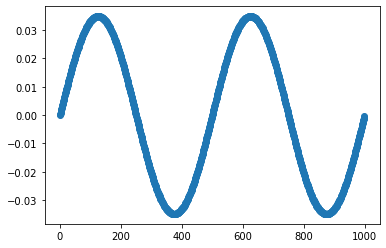

In [ ]:

ax = 1.;ay=2.;az=0.

a = np.sqrt(ax**2+ay**2+az**2)

ax=ax/a;ay=ay/a;az=az/a


import numpy as np
x = np.linspace(0,1000,1000,endpoint=False)
# 2hz 의 주파수 초당 두번 sin(2pift)
freq = 2
y = np.sin(2*np.pi*freq*x/1000)

# 각도 2도
_rad = np.deg2rad(2)
rad = _rad * np.sin(2*np.pi*freq*x/1000)

c = np.cos(rad)
s = np.sin(rad)

import matplotlib.pyplot as plt
plt.scatter(x,s)
#plt.scatter(x,s)

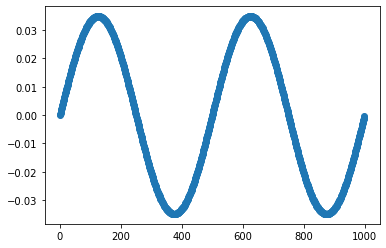

In [ ]:
import numpy as np
x = np.linspace(0,1000,1000,endpoint=False)
# 2hz 의 주파수 초당 두번 sin(2pift)
freq = 2
y = np.sin(2*np.pi*freq*x/1000)

# 각도 2도
_rad = np.deg2rad(2)
rad = _rad * np.sin(2*np.pi*freq*x/1000)


# 새 섹션

rod

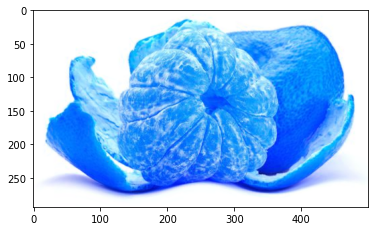

In [ ]:
import cv2
img= cv2.imread('./sample_data/mandarin.jpg',cv2.IMREAD_COLOR)
import matplotlib.pyplot as plt

img.shape
h, w = img.shape[:2]
import numpy as np
map2, map1 = np.indices((h,w), dtype=np.float32)
map2 = map2 + 10*np.sin(map1/32)

dst = cv2.remap(img,map1,map2,cv2.INTER_CUBIC, borderMode=cv2.BORDER_DEFAULT)

plt.imshow(dst)

Image 로부터 3D 좌표로 변환된뒤 다시 프로젝션된다. 문제는 Z 를 모른다는 건데.. 그냥 써보면 A(object) = projection1,AR(object) = projection2, Z 를 몰라도 되는가? 될듯..